In [63]:
%matplotlib inline
import pandas as pd

In [64]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [65]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [66]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [67]:
cast['decade']=cast.year//10*10
cast.head()

,title,year,name,type,character,n,decade
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN,2010


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

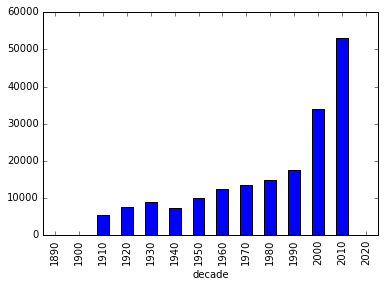

In [68]:
x=cast.groupby(['title','year','decade']).count().reset_index()
x=x.groupby('decade').size()
x.plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

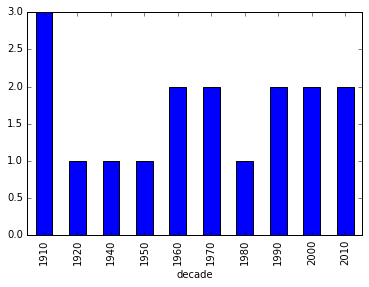

In [69]:
x=cast.groupby(['title','decade','year']).count()
x=x.ix['Hamlet'].reset_index()
x=x.groupby('decade').size()
x.plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [70]:
cast[(cast.decade==1950)&cast.n==1].groupby(['type','year']).size()

type     year
actor    1950    7492
         1951    8008
         1952    7500
         1953    7993
         1954    7737
         1955    7870
         1956    8051
         1957    8631
         1958    8885
         1959    8300
actress  1950    3095
         1951    3327
         1952    3237
         1953    3461
         1954    3406
         1955    3371
         1956    3585
         1957    3748
         1958    3738
         1959    3812
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [71]:
cast[(cast.decade==1950)&(cast.n>=1)&(cast.n<=5)].groupby('type').size()

type
actor      27747
actress    15941
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [72]:
cast[cast.title.str.contains('Pink Panther')].groupby(['title','year','type']).size()

title                           year  type   
Curse of the Pink Panther       1983  actor      54
                                      actress    13
Revenge of the Pink Panther     1978  actor      49
                                      actress    15
Son of the Pink Panther         1993  actor      34
                                      actress    12
The Pink Panther                1963  actor      14
                                      actress     5
                                2006  actor      66
                                      actress    23
The Pink Panther 2              2009  actor      57
                                      actress    25
The Pink Panther Strikes Again  1976  actor      60
                                      actress    13
The Return of the Pink Panther  1975  actor      25
                                      actress     5
Trail of the Pink Panther       1982  actor      32
                                      actress     8
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [93]:
x=cast[cast.name=="Frank Oz"].groupby(['title','year','name']).size()
x=x.reset_index()
x['roles']=x[0]
x=x.drop(0,1)
x[(x.roles>1)].sort_values('year', ascending=True)

,title,year,name,roles
23,The Muppet Movie,1979,Frank Oz,8
0,An American Werewolf in London,1981,Frank Oz,2
21,The Great Muppet Caper,1981,Frank Oz,6
20,The Dark Crystal,1982,Frank Oz,2
24,The Muppets Take Manhattan,1984,Frank Oz,7
2,Follow That Bird,1985,Frank Oz,3
22,The Muppet Christmas Carol,1992,Frank Oz,7
7,Muppet Treasure Island,1996,Frank Oz,4
8,Muppets from Space,1999,Frank Oz,4
18,The Adventures of Elmo in Grouchland,1999,Frank Oz,3


### List each of the characters that Frank Oz has portrayed at least twice.

In [94]:
x=cast[cast.name=="Frank Oz"].groupby('character').size()
x=x.reset_index()
x['roles']=x[0]
x=x.drop(0,1)
x[(x.roles>1)].sort_values('character', ascending=True)

,character,roles
0,Animal,6
2,Bert,3
5,Cookie Monster,3
10,Fozzie Bear,4
15,Grover,2
18,Miss Piggy,6
25,Sam the Eagle,5
34,Yoda,7
